In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


In [49]:
df = pd.read_csv('data/ai_improved.csv')

In [59]:
df.head()

,filename,store_name,store_address,store_code,taxpayer_name,tax_id,receipt_number,cashier_name,date,time,item_name,quantity,unit_price,line_total,subtotal,vat_18_percent,total_tax,cashless_payment,cash_payment,bonus_payment,advance_payment,credit_payment,queue_number,cash_register_model,cash_register_serial,fiscal_id,fiscal_registration,refund_amount,refund_date,refund_time
0,9FjTM9ngrpCu.jpeg,PROMART Məhdud Məsuliyyətli Cəmiyyəti,"AZ1007 BAKI ŞƏHƏRİ, NƏRİMANOV RAYONU, SÜLEYMAN...",1702278621-14001,PROMART Məhdud Məsuliyyətli Cəmiyyəti,1.702279e+09,16538,Hasanova Gulnar,15.01.2024,08:30:11,PECENYE ETI BURCAK,1.0,1.49,1.49,6.48,0.99,0.99,6.48,0.0,0.0,0.0,0.0,319.0,NCR RealPOS XR7 (7703) KLR M-POS 1.05.90,0000035727,9FİTMƏngrpCu,163236.0,0.17,15.02.2024,06:01
1,9FjTM9ngrpCu.jpeg,PROMART Məhdud Məsuliyyətli Cəmiyyəti,"AZ1007 BAKI ŞƏHƏRİ, NƏRİMANOV RAYONU, SÜLEYMAN...",1702278621-14001,PROMART Məhdud Məsuliyyətli Cəmiyyəti,1.702279e+09,16538,Hasanova Gulnar,15.01.2024,08:30:11,CAPPUCCINO JACOBS,1.0,0.79,0.79,6.48,0.99,0.99,6.48,0.0,0.0,0.0,0.0,319.0,NCR RealPOS XR7 (7703) KLR M-POS 1.05.90,0000035727,9FİTMƏngrpCu,163236.0,0.17,15.02.2024,06:01
2,9FjTM9ngrpCu.jpeg,PROMART Məhdud Məsuliyyətli Cəmiyyəti,"AZ1007 BAKI ŞƏHƏRİ, NƏRİMANOV RAYONU, SÜLEYMAN...",1702278621-14001,PROMART Məhdud Məsuliyyətli Cəmiyyəti,1.702279e+09,16538,Hasanova Gulnar,15.01.2024,08:30:11,KRUASSAN 7DAYS 200QR,1.0,4.20,4.20,6.48,0.99,0.99,6.48,0.0,0.0,0.0,0.0,319.0,NCR RealPOS XR7 (7703) KLR M-POS 1.05.90,0000035727,9FİTMƏngrpCu,163236.0,0.17,15.02.2024,06:01
3,zbRTryY1MVkR.jpeg,PROMART Məhdud Məsuliyyətli Cəmiyyəti,"AZ1007 BAKI ŞƏHƏRİ, NƏRİMANOV RAYONU, SÜLEYMAN...",1702278621-14001,PROMART Məhdud Məsuliyyətli Cəmiyyəti,1.702279e+09,786717,Quliyeva Gulnar,09.06.2023,08:20:47,SU SİRAB 1L QAZSIZ PL,1.0,0.85,0.85,3.33,0.51,0.51,3.33,0.0,0.0,0.0,0.0,90.0,IBM POS 700,41ARR40,zbRTiyYIMVKR,21835.0,0.09,09.07.2023,12:03
4,zbRTryY1MVkR.jpeg,PROMART Məhdud Məsuliyyətli Cəmiyyəti,"AZ1007 BAKI ŞƏHƏRİ, NƏRİMANOV RAYONU, SÜLEYMAN...",1702278621-14001,PROMART Məhdud Məsuliyyətli Cəmiyyəti,1.702279e+09,786717,Quliyeva Gulnar,09.06.2023,08:20:47,SU SİRAB 1L QAZSIZ PL,1.0,0.85,0.85,3.33,0.51,0.51,3.33,0.0,0.0,0.0,0.0,90.0,IBM POS 700,41ARR40,zbRTiyYIMVKR,21835.0,0.09,09.07.2023,12:03


In [19]:
df.dtypes

filename                 object
store_name               object
store_address            object
store_code               object
taxpayer_name            object
tax_id                  float64
receipt_number           object
cashier_name             object
date                     object
time                     object
item_name                object
quantity                float64
unit_price              float64
line_total              float64
subtotal                float64
vat_18_percent          float64
total_tax               float64
cashless_payment        float64
cash_payment            float64
bonus_payment           float64
advance_payment         float64
credit_payment          float64
queue_number            float64
cash_register_model      object
cash_register_serial     object
fiscal_id                object
fiscal_registration     float64
refund_amount           float64
refund_date              object
refund_time              object
dtype: object

In [36]:
df['date'] = pd.to_datetime(df['date'])
df['refund_date'] = pd.to_datetime(df['refund_date'])
df['time'] = pd.to_timedelta(df['time'].astype(str))
df['refund_time'] = pd.to_timedelta(df['refund_time'].astype(str))
df.dtypes


filename                         object
store_name                       object
store_address                    object
store_code                       object
taxpayer_name                    object
tax_id                          float64
receipt_number                   object
cashier_name                     object
date                     datetime64[ns]
time                    timedelta64[ns]
item_name                        object
quantity                        float64
unit_price                      float64
line_total                      float64
subtotal                        float64
vat_18_percent                  float64
total_tax                       float64
cashless_payment                float64
cash_payment                    float64
bonus_payment                   float64
advance_payment                 float64
credit_payment                  float64
queue_number                    float64
cash_register_model              object
cash_register_serial             object


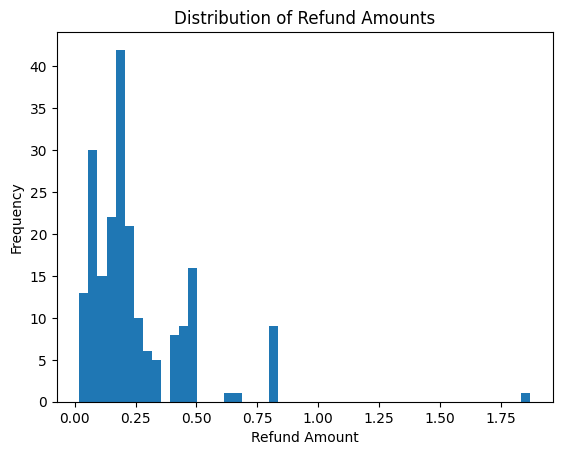

In [40]:
plt.hist(df['refund_amount'].dropna(), bins=50)
plt.xlabel('Refund Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Refund Amounts')
plt.show()

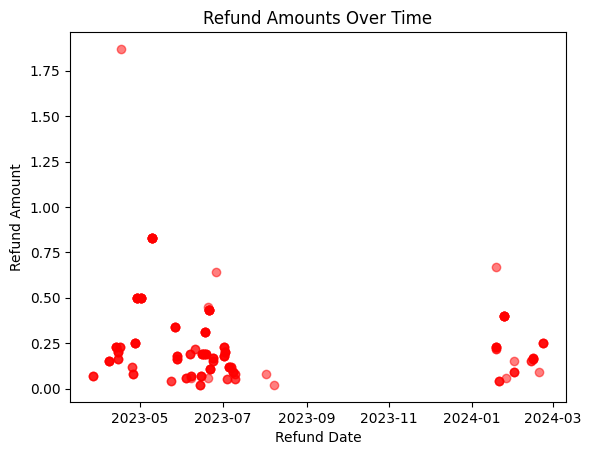

In [47]:
plt.scatter(df['refund_date'],df['refund_amount'],color='red',alpha=0.5)
plt.xlabel('Refund Date')
plt.ylabel('Refund Amount')
plt.title('Refund Amounts Over Time')
plt.show()

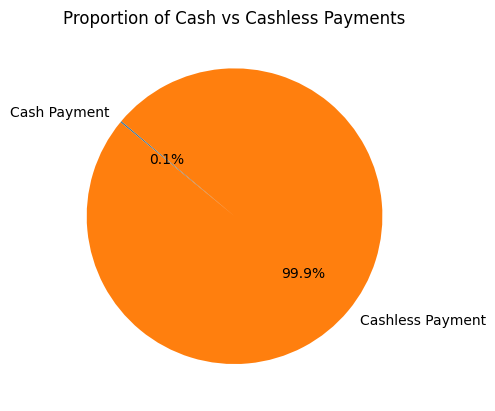

In [54]:
cash=df ['cash_payment'].sum()
cashless=df ['cashless_payment'].sum()
x= cash
y = cashless
labels = ['Cash Payment', 'Cashless Payment']
plt.pie([x, y], labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Cash vs Cashless Payments')
plt.show()

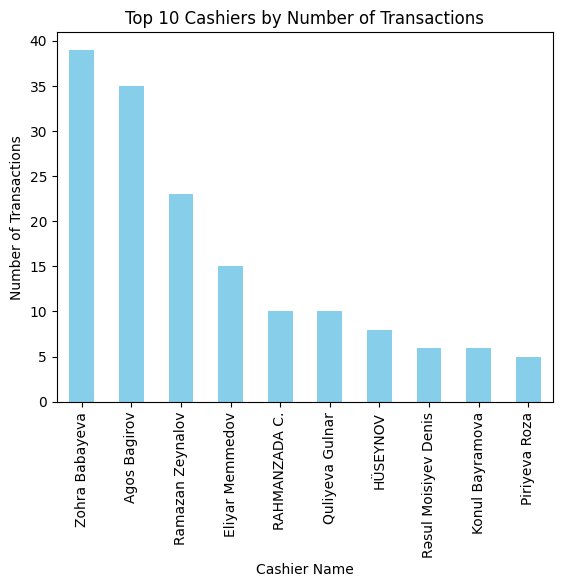

In [ ]:
df['cashier_name'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Cashier Name')
plt.ylabel('Number of Transactions')
plt.title('Top 10 Cashiers by Number of Transactions')
plt.show()

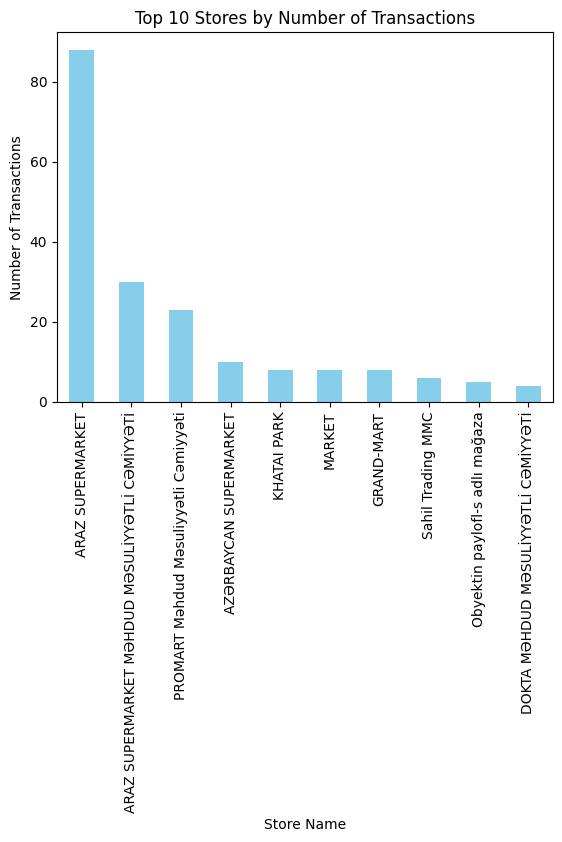

In [64]:
df['store_name'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Store Name')
plt.ylabel('Number of Transactions')
plt.title('Top 10 Stores by Number of Transactions')
plt.show()